## APPRENTISSAGE NON SUPERVISE

## APPRENTISSAGE NON SUPERVISE  : CLUSTERING

In [3]:
#  laisser la machine apprendre à classer nos données selon leur 
# ressemblance.

## K-Means CLUSTERING

In [4]:
# algorithme le plus populaire : le K-Means Clustering

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

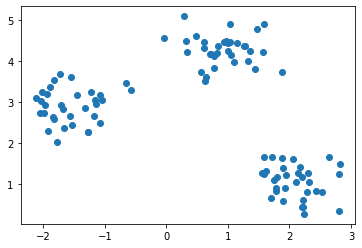

In [8]:
# Génération de données
X, y = make_blobs(n_samples=100, centers=3, cluster_std=0.4, 
                  random_state=0)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [9]:
# importer l'estimateur K-Means depuis cluster
from sklearn.cluster import KMeans

In [11]:
# création du modèle avec 
# n_clusters : nombre de clusters qu'on veut avoir : ex=3
# n_init : définir le nombre d'initialisation qu'on veut avoir 10 (défaut)
# max_iter : nombre itération max (200-300 par défaut)
# init = stratégie d'initialisation pour notre algo : K-Means++ par défaut
model = KMeans(n_clusters=3)
# on entraîne le modèle sur les données X
model.fit(X)

KMeans(n_clusters=3)

In [12]:
# comment sont classés nos échantillons
model.labels_

array([0, 2, 0, 2, 2, 2, 1, 1, 0, 2, 2, 2, 0, 2, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 2, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 1, 1, 2, 0, 0, 1, 1, 0, 0, 2,
       2, 2, 0, 0, 1, 1, 1, 0, 2, 0, 1, 1, 0, 0, 2, 0, 0, 1, 1, 1, 1, 0,
       2, 1, 0, 2, 1, 2, 2, 0, 0, 2, 2, 2, 1, 0, 2, 2, 0, 2, 0, 2, 2, 2,
       0, 2, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1])

In [13]:
#  ou predict()
model.predict(X)

array([0, 2, 0, 2, 2, 2, 1, 1, 0, 2, 2, 2, 0, 2, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 2, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 1, 1, 2, 0, 0, 1, 1, 0, 0, 2,
       2, 2, 0, 0, 1, 1, 1, 0, 2, 0, 1, 1, 0, 0, 2, 0, 0, 1, 1, 1, 1, 0,
       2, 1, 0, 2, 1, 2, 2, 0, 0, 2, 2, 2, 1, 0, 2, 2, 0, 2, 0, 2, 2, 2,
       0, 2, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1])

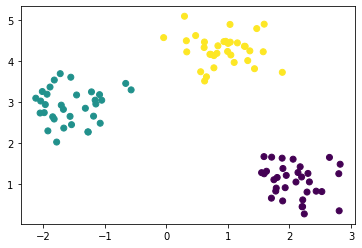

In [14]:
# visualiser comment sont classées nos données dans MATPLOTLIB
plt.scatter(X[:,0], X[:,1], c=model.predict(X))
plt.show()

In [16]:
# afficher la position finale de nos centroides
model.cluster_centers_
# tableau 3 lignes 2 colonnes

array([[ 2.08889087,  1.07930405],
       [-1.55022199,  2.90542155],
       [ 0.92702654,  4.27385438]])

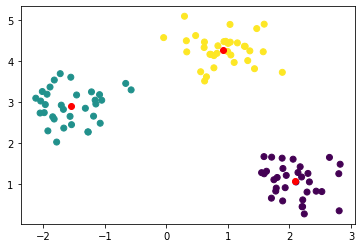

In [17]:
plt.scatter(X[:,0], X[:,1], c=model.predict(X))
#  pour afficher les centroides
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='r')
plt.show()

In [18]:
# pour un nouveau point dans le dataset, grace à ces centroides 
# on va calculer la distance avec les 3 centroides pour savoir à quel
# cluster il appartient

In [20]:
# calculer l'inertia de notre modèle = la fonction coût
model.inertia_
# 30 euros, cm... dépend de l'unité

30.87053128014066

In [22]:
#  ou mais en négatif
model.score(X)

-30.870531280140664

In [23]:
# on peut l'utiliser K-means comme transformer ==> retourne
# la distance entre les centroides et les poinst du cluster.

### K-Means Elbow method

In [25]:
# créer une liste vide qui contient les coûts des différents modèles
# de 1 à 20
inertia = []
k_range= range(1, 20)
for k in k_range:
    # boucle sur les k pour entrainer le modèle   
    model = KMeans(n_clusters=k).fit(X)
    # pour chaque modèle, on enregistre son coût dans la liste inertia
    inertia.append(model.inertia_)

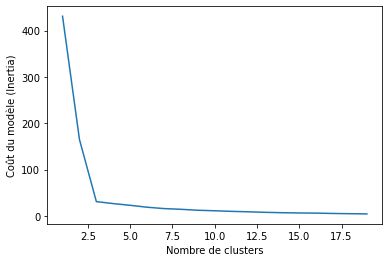

In [26]:
# tracer le graphique de inertia en fonction de k_range
plt.plot(k_range, inertia)
plt.xlabel('Nombre de clusters')
plt.ylabel('Coût du modèle (Inertia)')
plt.show()
# zone de coude pour cluster = 3 ==> ok avec nos observations

## ANOMALIE DETECTION

## 2. Detection d'anomalies avec Isolation Forest

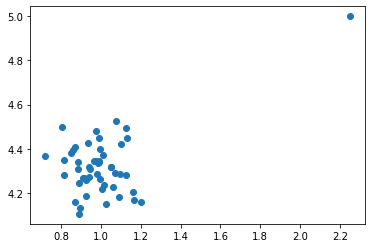

In [29]:
X, y = make_blobs(n_samples=50, centers=1, cluster_std=0.1, random_state=0)
X[-1,:] = np.array([2.25, 5])

plt.scatter(X[:,0], X[:, 1])
plt.show()

In [31]:
from sklearn.ensemble import IsolationForest

In [34]:
# taux de contamination qu'on désire filtrer dans le dataset... c'est tout
# 1% de contamination
model = IsolationForest(contamination=0.01)
# entraine le modèle
model.fit(X)

IsolationForest(contamination=0.01)

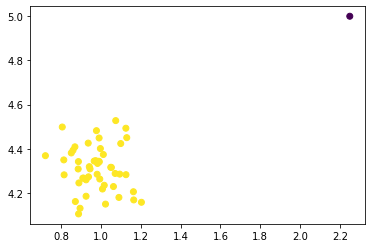

In [35]:
plt.scatter(X[:,0], X[:, 1], c=model.predict(X))
plt.show()

In [36]:
# anomalie fraude bancaire, défaillance technique dans une usine, 
# comportement anormal devant une caméra, outliers dans un dataset qu'on
# veut nettoyer...

### Application Décontamination Digits

In [37]:
#  Exemple : dans digit quels sont les chiffres les moins bien écrits
#  dataset de base dans sklearn

In [38]:
from sklearn.datasets import load_digits

In [39]:
# chargement du dataset 
digits = load_digits()
images = digits.images
X = digits.data
y = digits.target

print(X.shape)
# 1797 échantillons images de chiffres écrits de 0 à 9 sur 64*64 pixels

(1797, 64)


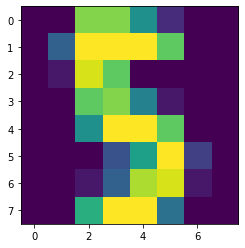

In [42]:
# afficher une des images des 1797 images du dataset
plt.imshow(images[74])
plt.show()

In [41]:
# but : nettoyer de ce dataset des images mal écrites

In [43]:
# entrainer un algo isolation forest (contamination 5% maximum)
model = IsolationForest(random_state=0, contamination=0.02)
# entraine le model sur X
model.fit(X)

IsolationForest(contamination=0.02, random_state=0)

In [44]:
# voir les prédictions du model
model.predict(X)
# tableau numpy avec des 1 pas des anomalies et -1 pas des anomalies

array([1, 1, 1, ..., 1, 1, 1])

In [45]:
# filtrer tout ça ==> boolean indexing

In [46]:
# on créé un outliers avec les prédictions à -1
outliers = model.predict(X) == -1

In [47]:
outliers

array([False, False, False, ..., False, False, False])

In [48]:
# on injecte le masque outliers dans image, X ou y
images[outliers]

array([[[ 0.,  0.,  0., ..., 15.,  4.,  0.],
        [ 0.,  0.,  0., ..., 16., 12.,  0.],
        [ 0.,  0.,  0., ..., 16., 12.,  0.],
        ...,
        [ 0.,  9., 16., ...,  1.,  0.,  0.],
        [ 0.,  3.,  8., ...,  9.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16., 12.,  0.]],

       [[ 0.,  6., 16., ..., 15., 10.,  0.],
        [ 0.,  9., 16., ...,  6.,  5.,  0.],
        [ 0., 12., 16., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  3., ...,  0.,  0.,  0.],
        [ 0.,  1.,  5., ...,  0.,  0.,  0.],
        [ 0.,  9., 16., ...,  0.,  0.,  0.]],

       [[ 0.,  4., 16., ..., 16.,  5.,  0.],
        [ 0., 11., 16., ...,  8.,  3.,  0.],
        [ 0., 10., 16., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0., 12., ...,  0.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.],
        [ 0.,  4., 16., ...,  0.,  0.,  0.]],

       ...,

       [[ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.

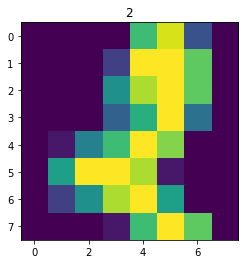

In [55]:
# in récupère la première image et on l'affiche
image_1 =images[outliers][0]
plt.imshow(image_1)
plt.title(y[outliers][0]) # censé être un 2
plt.show()

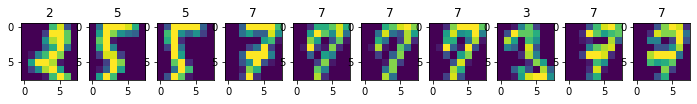

In [81]:
plt.figure(figsize=(12, 3))
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.imshow(images[outliers][i])
  plt.title(y[outliers][i])

## REDUCTION DE DIMENSION 

### 1. PCA - VISUALISATION 2D

In [58]:
from sklearn.decomposition import PCA

In [60]:
X.shape
# 64 variables

(1797, 64)

In [61]:
# on veut projeter ces 64 variables dans un espace 2D
# pour ensuite visualiser cette espace dans un graphique 2D

In [67]:
model = PCA(n_components=2)
# entraine le model et l'utiliserpour transformer les données
X_reduced = model.fit_transform(X)
model.fit_transform(X).shape
# 1797 lignes et 2 colonnes

(1797, 2)

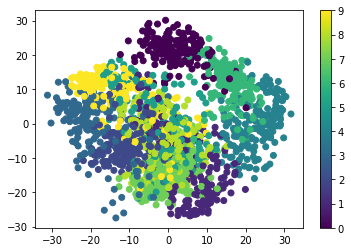

In [70]:
# affichage x_reduce
plt.scatter(X_reduced[:,0],X_reduced[:,1], c=y) # y contient de 0 à 9
plt.colorbar()
plt.show()

In [71]:
#  à quoi correspond x et y?
model.components_

array([[-0.00000000e+00, -1.73094644e-02, -2.23428835e-01,
        -1.35913308e-01, -3.30323045e-02, -9.66340793e-02,
        -8.32943467e-03,  2.26900148e-03, -3.20516472e-04,
        -1.19308900e-01, -2.44451674e-01,  1.48512748e-01,
        -4.67319328e-02, -2.17740749e-01, -1.48136747e-02,
         4.47779598e-03, -4.94136241e-05, -7.95419307e-02,
         8.33951451e-02,  2.15915338e-01, -1.72126800e-01,
        -1.63712103e-01,  2.86444489e-02,  4.23251849e-03,
         9.85488645e-05,  6.42319170e-02,  2.54093316e-01,
        -3.56771045e-02, -2.09462568e-01, -4.31311361e-02,
         5.13118737e-02,  2.13422754e-04, -0.00000000e+00,
         1.59950883e-01,  3.68690775e-01,  1.64406831e-01,
         8.52007886e-02,  3.72982881e-02,  2.15866997e-02,
        -0.00000000e+00,  1.28865588e-03,  1.06945286e-01,
         3.03067454e-01,  2.47813046e-01,  2.09637291e-01,
         1.22325194e-02, -3.69458508e-02,  1.61485026e-03,
         6.93023606e-04, -8.35144200e-03, -5.58598972e-0

In [72]:
model.components_.shape
# chaque composante contient 64 valeurs
# chaque composante est une combinaison linéaire des 64 varaibles de 
# notre dataset

(2, 64)

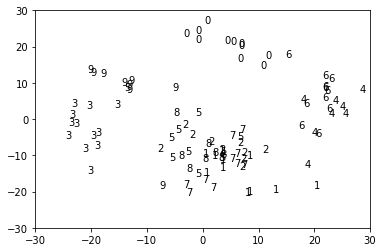

In [82]:
plt.figure()
plt.xlim(-30, 30)
plt.ylim(-30, 30)

for i in range(100):
    plt.text(X_reduced[i,0], X_reduced[i,1], str(y[i]))

### 2. Compression de données

In [73]:
# but préserver entre 95 et 99% de la variance de nos données

In [74]:
from sklearn.decomposition import PCA

In [75]:
X.shape
# 64 variables

(1797, 64)

In [83]:
# entrainer le modèle PCA sur les 64 variables
model = PCA(n_components=64)
# entraine le model et l'utiliserpour transformer les données
X_reduced = model.fit_transform(X)

In [84]:
# quel est le pourcentage de variance préservé par chacune de 
# nos composantes?
variances = model.explained_variance_ratio_
# % de variance préservé par chaque composante

In [85]:
# quelle est la somme cumulée de chacune de ces variances?
meilleur_dims = np.cumsum(variances)

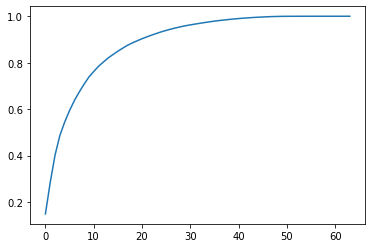

In [80]:
# on va trouver le moment où on attient 95% ou 99% entre réduire au maxi 
# où garder au maxi
plt.plot(meilleur_dims))
plt.show()

In [89]:
# argmax pour > 95 %
np.argmax(meilleur_dims > 0.95)

28

In [90]:
# argmax pour > 99 %
np.argmax(meilleur_dims > 0.99) # à partir de 40ième composante principale
# on obtient 99% de la variance

40

In [91]:
# on entraine le modèle avec ce nombre de composante de 40
# entrainer le modèle PCA sur les 64 variables
model = PCA(n_components=40)
# entraine le model et l'utiliserpour transformer les données
X_reduced = model.fit_transform(X)

In [92]:
# on a réduit la dimension à la meilleure valeur 
# en gardant 99% de la variance

In [95]:
# on décompresse en utilisant invers_transform() pour avoir 64 pixels
x_recovered = model.inverse_transform(X_reduced)
# les données n'ont pas la même position qu'elles avaient à l'origine
# on repositionne simplement les axes; les composantes principales, 
# là où elles avaient été calculées dans notre dataset

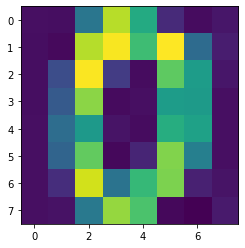

In [98]:
#  pour afficher une des images (première), redimensionner l'image
# en 8 pixels*8 pixels
plt.imshow(x_recovered[0].reshape(8, 8))
plt.show()

In [99]:
# la réduction de PCA à 40 composantes à bien préserver le chiffre 0

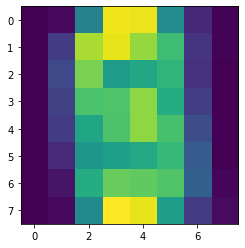

In [101]:
# exemple projection sur une dimension ==> voit plus rien
model = PCA(n_components=1)
# entraine le model et l'utiliserpour transformer les données
X_reduced_bis = model.fit_transform(X)
x_recovered_bis = model.inverse_transform(X_reduced_bis)
plt.imshow(x_recovered_bis[0].reshape(8, 8))
plt.show()

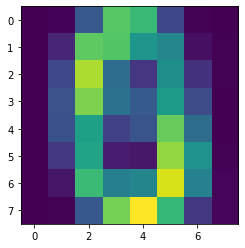

In [103]:
# exemple projection sur deux dimensions ==> voit un peu plus
model = PCA(n_components=2)
# entraine le model et l'utiliserpour transformer les données
X_reduced_bis = model.fit_transform(X)
x_recovered_bis = model.inverse_transform(X_reduced_bis)
plt.imshow(x_recovered_bis[0].reshape(8, 8))
plt.show()

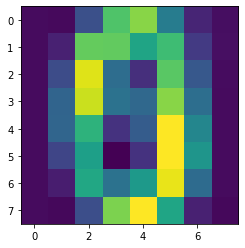

In [104]:
# exemple projection sur trois dimensions ==> voit encore un peu plus
model = PCA(n_components=3)
# entraine le model et l'utiliserpour transformer les données
X_reduced_bis = model.fit_transform(X)
x_recovered_bis = model.inverse_transform(X_reduced_bis)
plt.imshow(x_recovered_bis[0].reshape(8, 8))
plt.show()

In [105]:
# car plus on augmente le nombre de composantes, plus la variance
# est conservée

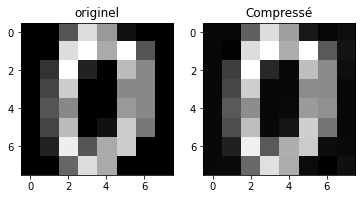

In [106]:
model = PCA(n_components=0.99)
model.fit(X)

X_compress = model.fit_transform(X)
X_decompress = model.inverse_transform(X_compress)

plt.subplot(1, 2, 1)
plt.imshow(X[0,:].reshape((8,8)), cmap='gray')
plt.title('originel')
plt.subplot(1, 2, 2)
plt.imshow(X_decompress[0,:].reshape((8,8)), cmap='gray')
plt.title('Compressé')
plt.show()

In [107]:
# savoir combien de composants sont utilisés pour préserver 99% variance
model.n_components_

41

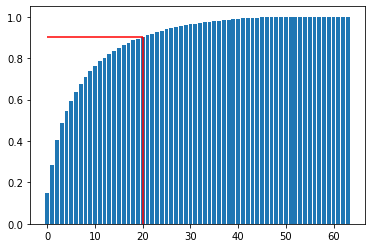

In [109]:
n_dims = X.shape[1]
model = PCA(n_components=n_dims)
model.fit(X)

variances = model.explained_variance_ratio_

meilleur_dims = np.argmax(np.cumsum(variances) > 0.90)


plt.bar(range(n_dims), np.cumsum(variances))
plt.hlines(0.90, 0, meilleur_dims, colors='r')
plt.vlines(meilleur_dims, 0, 0.90, colors='r')
plt.show()